# <center> Where it Pays to Attend College </center>
## <center> subtitle </center>
Project Description; [dataset](https://www.kaggle.com/wsj/college-salaries/)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphical analysis
import matplotlib.pyplot as plt # also graphical analysis


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['college-salaries', 'college-scorecard']


In [2]:
# Exploring college_type_df
college_type_df = pd.read_csv('../input/college-salaries/salaries-by-region.csv')

college_type_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [3]:
college_type_df.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Smith College,Northeastern,"$42,600.00","$110,000.00","$43,000.00","$54,100.00","$122,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


This data isn't too useful yet, because most of features aren't numerically stored.

In [4]:
college_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


This shows "Salaries by College Type" dataset has 320 entries, but both the Mid-Carrer 10th and 90th Percentile Salary are missing data - and, everything is an object, including features that should be int64 or float64. However, all of this data seems useful, so there's no need to initially drop any columns. Let's manage the missing data first by inserting the mean of the column into each NaN. Another method would be organizing the schools by lowest to highest median salary and then forward filling the missing data, but using the mean should be more accurate here.

In [5]:
# Cleaning college_type_df and turning into numerical data
## TODO: TURN INTO FUNCTION

college_type_df['Starting Median Salary'] = college_type_df['Starting Median Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Starting Median Salary'] = college_type_df['Starting Median Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Starting Median Salary'] = college_type_df['Starting Median Salary'].astype('float64')

college_type_df['Mid-Career Median Salary'] = college_type_df['Mid-Career Median Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Mid-Career Median Salary'] = college_type_df['Mid-Career Median Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Mid-Career Median Salary'] = college_type_df['Mid-Career Median Salary'].astype('float64')

college_type_df['Mid-Career 10th Percentile Salary'] = college_type_df['Mid-Career 10th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Mid-Career 10th Percentile Salary'] = college_type_df['Mid-Career 10th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Mid-Career 10th Percentile Salary'] = college_type_df['Mid-Career 10th Percentile Salary'].astype('float64')

college_type_df['Mid-Career 25th Percentile Salary'] = college_type_df['Mid-Career 25th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Mid-Career 25th Percentile Salary'] = college_type_df['Mid-Career 25th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Mid-Career 25th Percentile Salary'] = college_type_df['Mid-Career 25th Percentile Salary'].astype('float64')

college_type_df['Mid-Career 75th Percentile Salary'] = college_type_df['Mid-Career 75th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Mid-Career 75th Percentile Salary'] = college_type_df['Mid-Career 75th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Mid-Career 75th Percentile Salary'] = college_type_df['Mid-Career 75th Percentile Salary'].astype('float64')

college_type_df['Mid-Career 90th Percentile Salary'] = college_type_df['Mid-Career 90th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).strip('$'))
college_type_df['Mid-Career 90th Percentile Salary'] = college_type_df['Mid-Career 90th Percentile Salary'].apply(lambda x: np.nan if x == 'nan' else str(x).replace(',', ''))
college_type_df['Mid-Career 90th Percentile Salary'] = college_type_df['Mid-Career 90th Percentile Salary'].astype('float64')
college_type_df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0
6,University of California at Los Angeles (UCLA),California,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0
7,"University of California, San Diego (UCSD)",California,51100.0,101000.0,51700.0,75400.0,131000.0,177000.0
8,Pomona College,California,48600.0,101000.0,NaN,63300.0,161000.0,NaN
9,University of Southern California (USC),California,54800.0,99600.0,49700.0,73800.0,140000.0,201000.0


In [6]:
college_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null float64
Mid-Career Median Salary             320 non-null float64
Mid-Career 10th Percentile Salary    273 non-null float64
Mid-Career 25th Percentile Salary    320 non-null float64
Mid-Career 75th Percentile Salary    320 non-null float64
Mid-Career 90th Percentile Salary    273 non-null float64
dtypes: float64(6), object(2)
memory usage: 20.1+ KB


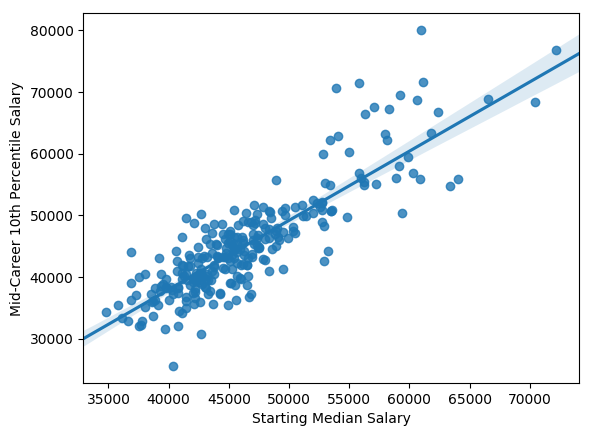

In [7]:
# Checking if it's better to forward fill missing data using sort by Starting Median Salary or Mid-Career Median Salary
# Starting Median Salary linear correlation test
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset params to default

sns.regplot(x=college_type_df['Starting Median Salary'], y=college_type_df['Mid-Career 10th Percentile Salary'], data=college_type_df, robust=True)
plt.show()

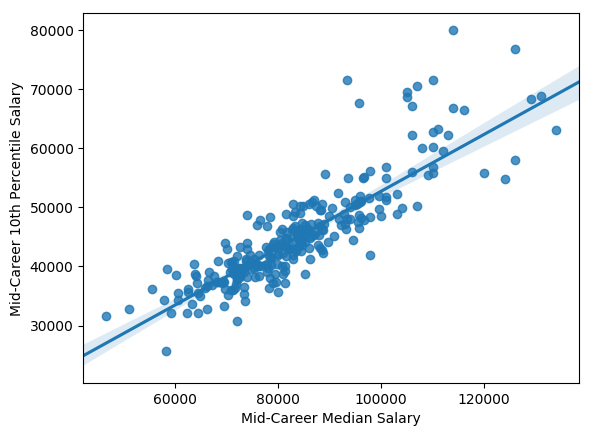

In [8]:
# Mid-Career Median Salary linear correlation test
sns.regplot(x=college_type_df['Mid-Career Median Salary'], y=college_type_df['Mid-Career 10th Percentile Salary'], data=college_type_df, robust=True)
plt.show()

##TODO: Find actual r value; useful link https://seaborn.pydata.org/tutorial/regression.html

This line fits the data better (less faded blue margin = better r value), so it's better to fill our data using sort by Mid-Career Median Salary.

In [9]:
sorted_college_type_df = college_type_df.sort_values(by='Mid-Career Median Salary')
sorted_college_type_df['Mid-Career 10th Percentile Salary'] = college_type_df['Mid-Career 10th Percentile Salary'].fillna(method='ffill')
sorted_college_type_df['Mid-Career 90th Percentile Salary'] = college_type_df['Mid-Career 90th Percentile Salary'].fillna(method='ffill')
sorted_college_type_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 140 to 220
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null float64
Mid-Career Median Salary             320 non-null float64
Mid-Career 10th Percentile Salary    320 non-null float64
Mid-Career 25th Percentile Salary    320 non-null float64
Mid-Career 75th Percentile Salary    320 non-null float64
Mid-Career 90th Percentile Salary    320 non-null float64
dtypes: float64(6), object(2)
memory usage: 22.5+ KB


This is more useful data, as the numerical columns can report proper statistics. Now we can begin to visualize this dataset (without the acceptance rates at first).

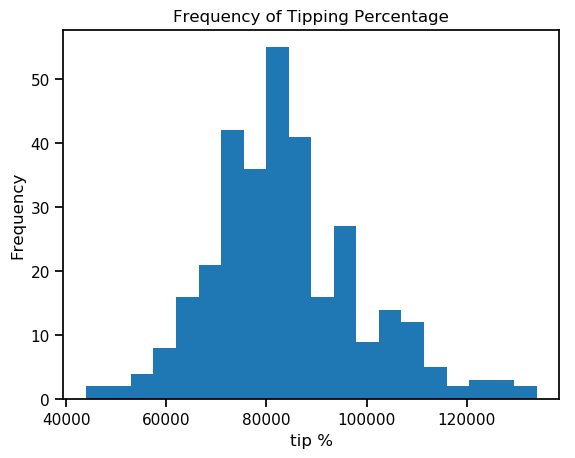

In [10]:
# For data viz: use Univariate graphs (histograms, boxplots, swarmplots/violin plots) 
# and Bivariate graphs (bar plots, count plots, scatter plots, pair plots)

sns.set_context('notebook')
plt.hist(sorted_college_type_df['Mid-Career Median Salary'], bins=20)
plt.xlabel("tip %")
plt.ylabel("Frequency")
plt.title("Frequency of Tipping Percentage")
plt.show()

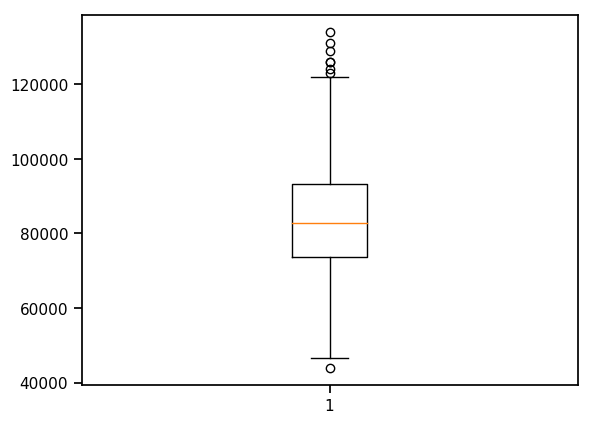

In [11]:
plt.boxplot(sorted_college_type_df['Mid-Career Median Salary'])
plt.show()
# Median Salary is about 80k, with more outliers in the higher portion than the lower

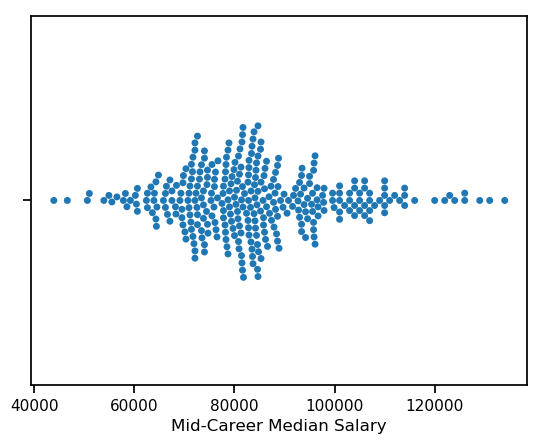

In [12]:
sns.swarmplot(sorted_college_type_df['Mid-Career Median Salary'])#, hue = 'Region', color = '')
plt.show()

In [13]:
# sns.barplot(x=sorted_college_type_df['School Name'], y=sorted_college_type_df['Mid-Career Median Salary'])
# plt.show()
# sns.barplot?
plt.rcParams['figure.figsize']=(100,50)

average_age = sorted_college_type_df.groupby(['School Name'], as_index=False)
graph = sns.barplot(x='School Name', y='Mid-Career Median Salary', data=sorted_college_type_df)

for label in graph.get_xticklabels():
    label.set_rotation(45)

In [14]:
# sns.countplot(x='survived', hue='age_category', data=titanic)

In [15]:
# sns.heatmap

Now we take a look at the [College Scorecard Raw Data](https://collegescorecard.ed.gov/data/) from the U.S. Department of Education, and use it to find the acceptance rates for our colleges.

In [16]:
print(os.listdir("../input/college-scorecard/collegescorecard_raw_data/CollegeScorecard_Raw_Data"))

['MERGED2004_05_PP.csv', 'MERGED2002_03_PP.csv', 'Crosswalks.zip', 'MERGED2006_07_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED1997_98_PP.csv', 'data.yaml', 'MERGED2012_13_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2007_08_PP.csv']


In [17]:
unclean_accept_rate_df = pd.read_csv('../input/college-scorecard/collegescorecard_raw_data/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv')
# https://collegescorecard.ed.gov/data/documentation/

accept_rate_df = unclean_accept_rate_df[['INSTNM', 'CITY', 'ADM_RATE']]
# accept_rate_df = accept_rate_df[accept_rate_df['INSTNM'] != school name from other dataset]

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9,31,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
"""
Continuing from here:
1. Combine data into one dataframe for acceptance rate and salaries
2. Graph acceptance rates vs. various salary features to test for relevant data
3. Train models (KNN, DTree, RandForest) to predict acceptance rate, use best scoring model, and create a new column for those predictions
    - Feature importance using RandomForest
    - Confusion Matrix?
4. Extract all schools in which the predictions were x% wrong
5. Split into two categories: underpredicted and overpredicted acceptance rate
6. Only apply to underpredicted schools :)
7. Neural Network?
PROJECT PT. 2
7. Find salary based off of major
8. Do stuff with it
"""

'\nContinuing from here:\n1. Combine data into one dataframe for acceptance rate and salaries\n2. Graph acceptance rates vs. various salary features to test for relevant data\n3. Train models (KNN, DTree, RandForest) to predict acceptance rate, use best scoring model, and create a new column for those predictions\n    - Feature importance using RandomForest\n    - Confusion Matrix?\n4. Extract all schools in which the predictions were x% wrong\n5. Split into two categories: underpredicted and overpredicted acceptance rate\n6. Only apply to underpredicted schools :)\n7. Neural Network?\nPROJECT PT. 2\n7. Find salary based off of major\n8. Do stuff with it\n'

In [19]:
sorted_college_type_df['School Name'].nunique()

320

In [20]:
accept_rate_df['INSTNM'].nunique()

6924

In [21]:
college = 'Harvey Mudd College'
accept_rate_df[accept_rate_df['INSTNM'] == college]['ADM_RATE'].count()

1

In [22]:
all_college_names = sorted_college_type_df['School Name'].values
college_names = [name.split('(')[0].strip() for name in all_college_names]
college_names

['Black Hills State University',
 'Davenport University',
 'Montana State University - Billings',
 'Florida Metropolitan University',
 'Lee University',
 'Virginia Wesleyan College',
 'Tusculum College',
 'Southern Utah University',
 'Saint Leo University',
 'Pittsburg State University',
 'Indiana Wesleyan University',
 'Austin Peay State University',
 'Dallas Baptist University',
 'Mississippi College',
 'University of Wisconsin',
 'Morehead State University',
 'Tarleton State University',
 'Kent State University',
 'Mercy College',
 'Arkansas State University',
 'University of Southern Maine',
 'Evergreen State College',
 'University of Wisconsin',
 'Park University',
 'Oklahoma City University',
 'University of North Carolina at Wilmington',
 'Ball State University',
 'University of Wisconsin',
 'University of Missouri - Kansas City',
 'State University of New York',
 'Jacksonville University',
 'University of Wisconsin',
 'Western Carolina University',
 'University of Missouri - St

In [23]:
matching_df = accept_rate_df[accept_rate_df['INSTNM'].isin(college_names)]
print(matching_df.shape)
matching_df.columns = ['School Name','CITY','Acceptance Rate']
matching_df

(199, 3)


,School Name,CITY,Acceptance Rate
1,University of Alabama at Birmingham,Birmingham,0.9181
9,Auburn University,Auburn,0.8393
79,University of Arizona,Tucson,0.8358
126,University of Arkansas,Fayetteville,0.6596
211,California Institute of Technology,Pasadena,0.0774
324,Harvey Mudd College,Claremont,0.1542
328,Humboldt State University,Arcata,0.8183
405,Occidental College,Los Angeles,0.4179
425,Pomona College,Claremont,0.0836
447,San Diego State University,San Diego,0.3542


In [24]:
sorted_college_type_df['School Name'] = sorted_college_type_df['School Name'].apply(lambda x: x.split('(')[0].strip())

In [25]:
matching_df['School Name']

1                     University of Alabama at Birmingham
9                                       Auburn University
79                                  University of Arizona
126                                University of Arkansas
211                    California Institute of Technology
324                                   Harvey Mudd College
328                             Humboldt State University
405                                    Occidental College
425                                        Pomona College
447                            San Diego State University
451                        San Francisco State University
459                             San Jose State University
492                     University of Southern California
496                                Thomas Aquinas College
531                                      Colorado College
536                              Colorado School of Mines
548                                    Fort Lewis College
567           

In [26]:
matching_school_names = matching_df['School Name'].values
college_type_school_names = sorted_college_type_df['School Name'].values

matches = []
misses  = [] 
for name in matching_school_names:
    if name in college_type_school_names:
        matches.append(name)
    else:
        misses.append(name)
        
print(len(matches))
print(len(misses))

199
0


In [27]:
matching_df['School Name'] == sorted_college_type_df['School Name']

ValueError: Can only compare identically-labeled Series objects

In [28]:
import numpy as np

def add_adm_rate(college):
    val = matching_df[matching_df['School Name'] == college]['Acceptance Rate'].values
    if len(val) > 0:
        return val[0]
    else:
        return np.nan

sorted_college_type_df['Acceptance Rate'] = sorted_college_type_df['School Name'].apply(add_adm_rate)

In [29]:
sorted_college_type_df['Acceptance Rate']

140    0.8695
139    0.8192
69        NaN
219       NaN
218    0.8504
217       NaN
216       NaN
68     0.7580
215    0.5849
138    0.8721
137       NaN
214    0.9013
213    0.3942
212    0.3903
136       NaN
211    0.7962
210    0.5038
135       NaN
319    0.7873
209       NaN
318    0.8348
67        NaN
134       NaN
133    0.6904
208    0.7170
207       NaN
132    0.6208
131       NaN
130       NaN
317       NaN
        ...  
28     0.5572
143    0.0986
144       NaN
238    0.1363
237    0.3081
236    0.1290
235       NaN
234    0.2814
233    0.0849
232    0.3108
231    0.1267
230    0.4317
142    0.1568
141    0.1586
229    0.2220
3         NaN
71        NaN
227       NaN
226       NaN
228    0.4849
70     0.1892
225    0.0930
2      0.1542
1      0.0774
224    0.0516
222    0.0717
223    0.0693
0      0.0473
221    0.0641
220    0.1045
Name: Acceptance Rate, Length: 320, dtype: float64

In [30]:
sorted_college_type_df['Acceptance Rate'].isnull().sum()

124

In [31]:
matching_test_dataset = sorted_college_type_df[sorted_college_type_df['Acceptance Rate'] > 0]

matching_test_dataset

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Acceptance Rate
140,Black Hills State University,Midwestern,35300.0,43900.0,31600.0,32200.0,60900.0,85700.0,0.8695
139,Davenport University,Midwestern,39700.0,46600.0,31600.0,38100.0,65600.0,85700.0,0.8192
218,Lee University,Southern,34500.0,53900.0,36200.0,44500.0,76800.0,124000.0,0.8504
68,Southern Utah University,Western,41900.0,56500.0,38800.0,39700.0,78400.0,120000.0,0.7580
215,Saint Leo University,Southern,40900.0,57800.0,34400.0,41800.0,80600.0,113000.0,0.5849
138,Pittsburg State University,Midwestern,40400.0,58200.0,25600.0,46000.0,84600.0,117000.0,0.8721
214,Austin Peay State University,Southern,37700.0,59200.0,32200.0,40500.0,73900.0,96200.0,0.9013
213,Dallas Baptist University,Southern,39400.0,60200.0,38500.0,50300.0,81800.0,98100.0,0.3942
212,Mississippi College,Southern,35400.0,60400.0,34300.0,43900.0,80400.0,91300.0,0.3903
211,Morehead State University,Southern,34800.0,60600.0,34300.0,46500.0,72000.0,91300.0,0.7962


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

accept_model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=100)

X = matching_test_dataset.drop(columns=['Acceptance Rate', 'School Name', 'Region'])
y = matching_test_dataset['Acceptance Rate']

In [33]:
accept_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
accept_model.predict(X)

array([0.8205241 , 0.78170535, 0.78322042, 0.7080804 , 0.64968617,
       0.7934906 , 0.83230762, 0.53368634, 0.54203837, 0.72513058,
       0.60840979, 0.74202464, 0.7585029 , 0.70278783, 0.67114358,
       0.67650216, 0.8015155 , 0.48618046, 0.72654635, 0.74818028,
       0.80806715, 0.74426311, 0.80225361, 0.75972814, 0.82477121,
       0.82980474, 0.85785453, 0.87728626, 0.85966443, 0.6657202 ,
       0.81877737, 0.64495823, 0.58528695, 0.76525574, 0.83173858,
       0.71195577, 0.6039792 , 0.79258894, 0.82854161, 0.84781094,
       0.61485414, 0.79516329, 0.53151716, 0.715496  , 0.77262519,
       0.73008326, 0.75554687, 0.26938347, 0.65055596, 0.80640424,
       0.62439298, 0.84746085, 0.69267563, 0.70405908, 0.65653342,
       0.40252625, 0.75061107, 0.48994885, 0.65793375, 0.85999568,
       0.69873505, 0.84951572, 0.88317742, 0.64117595, 0.87697443,
       0.75994722, 0.66329413, 0.76682601, 0.79715061, 0.67356814,
       0.79353307, 0.62064827, 0.59920986, 0.79271834, 0.70191

In [35]:
accept_model.score(X, y)
#only on original data
#need test and validation data

0.9342758230386383